Họ và tên: Trương Quốc Bình

MSSV: 19521270

Bài tập: BT4-Cài đặt mô hình Neural Network bằng Tensorflow


In [2]:
import tensorflow as tf
import numpy as np

(100, 2)


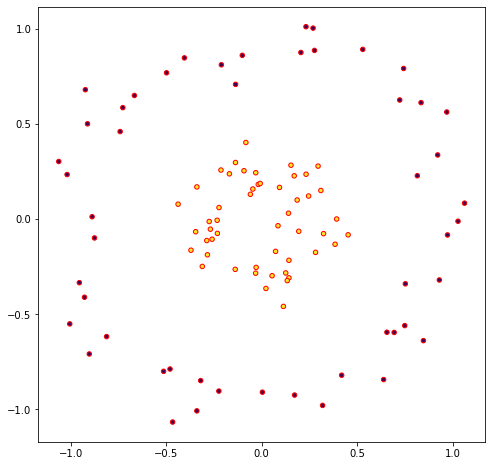

In [6]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_circles
plt.figure(figsize=(8, 8))

X, y = make_circles(noise=0.1, factor=0.3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=20, edgecolor="r")
print(X.shape)
plt.show()

In [7]:
n_class=2 
n_featue=2

In [8]:
n_sample=100

In [9]:
ones = np.ones(n_sample)
X = X.T
X = np.vstack((ones, X)).astype('float64')
X = X.T

In [10]:
Y = tf.one_hot(y, n_class, axis=0).numpy().astype('float64')

In [11]:
def plot_data():
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=20, edgecolor="k")
    plt.show()

In [12]:
input_layer = tf.Variable(np.random.randn(n_featue+1, 16).astype('float64'), trainable=True)
hidden_layer_1 = tf.Variable(np.random.randn(16, 32).astype('float64'), trainable=True)
hidden_layer_2 = tf.Variable(np.random.randn(32, n_class).astype('float64'), trainable=True)

def Loss(input_layer, hidden_layer_1, hidden_layer_2):
    Z_1 = tf.matmul(X, input_layer)
    Z_1_sigmoid = tf.sigmoid(Z_1)

    Z_2 = tf.matmul(Z_1_sigmoid, hidden_layer_1)
    Z_2_sigmoid = tf.sigmoid(Z_2)

    Y_hat = tf.matmul(Z_2_sigmoid, hidden_layer_2)
    Y_hat_soft = tf.nn.softmax(Y_hat, axis=1)
    
    log_Y_hat_soft = tf.math.log(Y_hat_soft)

    loss_matrix = tf.transpose(Y) * log_Y_hat_soft

    # Sum loss for each data, then sum all the loss
    return - tf.math.reduce_mean(tf.math.reduce_sum(loss_matrix, axis=1), axis=0)

def predict_class(X, input_layer, hidden_layer_1, hidden_layer_2):
    Z_1 = tf.matmul(X, input_layer)
    Z_1_sigmoid = tf.sigmoid(Z_1)

    Z_2 = tf.matmul(Z_1_sigmoid, hidden_layer_1)
    Z_2_sigmoid = tf.sigmoid(Z_2)

    Y_hat = tf.matmul(Z_2_sigmoid, hidden_layer_2)
    Y_hat_soft = tf.nn.softmax(Y_hat, axis=1)
    
    return np.argmax(Y_hat_soft, axis=1)

In [14]:

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
epsilon = 0.01
count_epoch = 1
epoch = 500
while True:
    # Calculate loss
    with tf.GradientTape() as tape:
        loss = Loss(input_layer, hidden_layer_1, hidden_layer_2)
        
    # Update theta
    grads = tape.gradient(loss, [input_layer, hidden_layer_1, hidden_layer_2])
    opt.apply_gradients(zip(grads, [input_layer, hidden_layer_1, hidden_layer_2]))
    print("Epoch: %d Loss: %.8f" %(count_epoch, loss.numpy()))
    if (tf.experimental.numpy.all((tf.math.abs(grads[0]) < epsilon)) and 
        tf.experimental.numpy.all((tf.math.abs(grads[1]) < epsilon)) and
        tf.experimental.numpy.all((tf.math.abs(grads[2]) < epsilon))) or count_epoch == epoch:
        break

    count_epoch += 1

Epoch: 1 Loss: 0.26693980
Epoch: 2 Loss: 0.26622057
Epoch: 3 Loss: 0.26550304
Epoch: 4 Loss: 0.26478723
Epoch: 5 Loss: 0.26407312
Epoch: 6 Loss: 0.26336072
Epoch: 7 Loss: 0.26265004
Epoch: 8 Loss: 0.26194107
Epoch: 9 Loss: 0.26123382
Epoch: 10 Loss: 0.26052829
Epoch: 11 Loss: 0.25982448
Epoch: 12 Loss: 0.25912240
Epoch: 13 Loss: 0.25842203
Epoch: 14 Loss: 0.25772340
Epoch: 15 Loss: 0.25702650
Epoch: 16 Loss: 0.25633132
Epoch: 17 Loss: 0.25563788
Epoch: 18 Loss: 0.25494616
Epoch: 19 Loss: 0.25425619
Epoch: 20 Loss: 0.25356794
Epoch: 21 Loss: 0.25288144
Epoch: 22 Loss: 0.25219667
Epoch: 23 Loss: 0.25151364
Epoch: 24 Loss: 0.25083235
Epoch: 25 Loss: 0.25015281
Epoch: 26 Loss: 0.24947500
Epoch: 27 Loss: 0.24879894
Epoch: 28 Loss: 0.24812462
Epoch: 29 Loss: 0.24745205
Epoch: 30 Loss: 0.24678122
Epoch: 31 Loss: 0.24611213
Epoch: 32 Loss: 0.24544480
Epoch: 33 Loss: 0.24477921
Epoch: 34 Loss: 0.24411536
Epoch: 35 Loss: 0.24345327
Epoch: 36 Loss: 0.24279292
Epoch: 37 Loss: 0.24213433
Epoch: 38 